In [28]:
# Trace Clustering in Process Mining
## Importing librarires
import pm4py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pm4py.objects.log.util import get_log_representation as get_
warnings.simplefilter("ignore")
from sklearn.decomposition import PCA
from pm4py.objects.log.obj import EventLog, Trace
import matplotlib.pyplot as plt
# from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from pm4py.objects.log.log import EventLog

## Importing log
Importing event log of Sepsis

In [29]:


# Importing a XES event log
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('Datasets/Sepsis Cases - Event Log.xes.gz')
#log[1],type(log)

parsing log, completed traces :: 100%|██████████| 1050/1050 [00:02<00:00, 490.47it/s]


### Extracting total Activities

In [30]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(log, "concept:name")
activities

{'ER Registration': 1050,
 'Leucocytes': 3383,
 'CRP': 3262,
 'LacticAcid': 1466,
 'ER Triage': 1053,
 'ER Sepsis Triage': 1049,
 'IV Liquid': 753,
 'IV Antibiotics': 823,
 'Admission NC': 1182,
 'Release A': 671,
 'Return ER': 294,
 'Admission IC': 117,
 'Release B': 56,
 'Release C': 25,
 'Release D': 24,
 'Release E': 6}


### Converting activity keys in to a list

## Converting log in to a pandas dataframe

In [31]:

from pm4py.objects.conversion.log import converter as log_converter
dataframe = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
#dataframe.to_csv('log.csv')
#dataframe
## Trace profiling on Activities
dataframe =dataframe[['case:concept:name','concept:name']]
dataframe

,case:concept:name,concept:name
0,A,ER Registration
1,A,Leucocytes
2,A,CRP
3,A,LacticAcid
4,A,ER Triage
...,...,...
15209,KNA,CRP
15210,KNA,Release A
15211,LNA,ER Registration
15212,LNA,ER Triage


### Making np_array from Dataframe and grouping them on the basis of case identifier

Events in each trace of the complete event log.

In [32]:
np_arr = np.array(dataframe)
n = np.unique(np_arr[:,0])
events = np.array( [(np_arr[np_arr[:,0]==i,1]) for i in n] )
events

array([array(['ER Registration', 'Leucocytes', 'CRP', 'LacticAcid', 'ER Triage',
              'ER Sepsis Triage', 'IV Liquid', 'IV Antibiotics', 'Admission NC',
              'CRP', 'Leucocytes', 'Leucocytes', 'CRP', 'Leucocytes', 'CRP',
              'CRP', 'Leucocytes', 'Leucocytes', 'CRP', 'CRP', 'Leucocytes',
              'Release A'], dtype=object)                                       ,
       array(['ER Registration', 'ER Triage', 'ER Sepsis Triage', 'Leucocytes',
              'LacticAcid', 'CRP', 'IV Liquid', 'IV Antibiotics'], dtype=object),
       array(['ER Registration', 'ER Triage', 'ER Sepsis Triage', 'IV Liquid',
              'Leucocytes', 'CRP', 'LacticAcid', 'IV Antibiotics',
              'Admission NC', 'Release A', 'Return ER'], dtype=object)        ,
       ...,
       array(['ER Registration', 'ER Triage', 'ER Sepsis Triage', 'LacticAcid',
              'Leucocytes', 'CRP', 'IV Liquid', 'IV Antibiotics', 'Admission NC',
              'Release A'], dtype=object

## 2d Vector of Number of CASES X Number of Activities

In [33]:

length  = len(log)
width = len(activities_array)
length,width
vectors  = [ [0] * width for _ in range(length)]
type(vectors),len(vectors)
vectors

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Making ND-Array of the Activity Vector

##  Creating Set of Activities - Extracting Activities from the Event log

In [34]:
set_vector, features = get_.get_representation(log, str_ev_attr=['concept:name'], str_tr_attr=[],
                                                  num_ev_attr=[], num_tr_attr=[], str_evsucc_attr=[])

In [35]:
features

['event:concept:name@Admission IC',
 'event:concept:name@Admission NC',
 'event:concept:name@CRP',
 'event:concept:name@ER Registration',
 'event:concept:name@ER Sepsis Triage',
 'event:concept:name@ER Triage',
 'event:concept:name@IV Antibiotics',
 'event:concept:name@IV Liquid',
 'event:concept:name@LacticAcid',
 'event:concept:name@Leucocytes',
 'event:concept:name@Release A',
 'event:concept:name@Release B',
 'event:concept:name@Release C',
 'event:concept:name@Release D',
 'event:concept:name@Release E',
 'event:concept:name@Return ER']

In [36]:
set_vector[1]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [37]:
type(set_vector),len(set_vector)

(numpy.ndarray, 1050)

### Merging Set and Bag vectors

In [38]:
merged = set_vector

In [39]:
merged

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

##  Elbow Method to extract optimal number of clusters

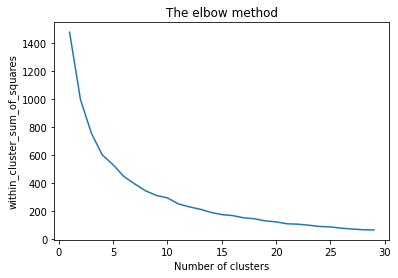

In [40]:

from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(merged)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 30), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()


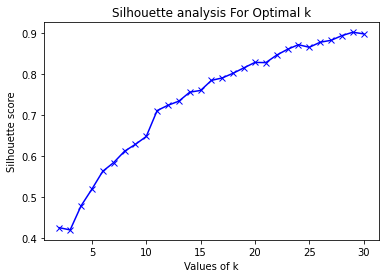

In [41]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(merged)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(merged, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of k") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [42]:




kmeans = KMeans(
        init="k-means++",
        n_clusters=26,
        n_init=1,
        max_iter=100000,
        random_state=100
    )
km = kmeans.fit(merged)

already_seen = {}
labels = km.labels_
clusters = []

for i in range(len(log)):
        if not labels[i] in already_seen:
            already_seen[labels[i]] = len(list(already_seen.keys()))
            clusters.append(EventLog())
        trace = log[i]
        clusters[already_seen[labels[i]]].append(trace)


for cl in range(len(clusters)):
    print(cl, len(clusters[cl]))

0 267
1 10
2 191
3 117
4 9
5 23
6 35
7 69
8 39
9 35
10 18
11 16
12 15
13 16
14 24
15 11
16 32
17 14
18 23
19 10
20 34
21 10
22 13
23 8
24 6
25 5


In [43]:
sub_log1 = clusters[0]
sub_log2 = clusters[1]
sub_log3 = clusters[2]
sub_log4 = clusters[3]
sub_log5 = clusters[4]
sub_log6 = clusters[5]
sub_log7 = clusters[6]
sub_log8 = clusters[7]
sub_log9 = clusters[8]
sub_log10 = clusters[9]

In [45]:
pm4py.write_xes(sub_log1, 'sepsis_sublogs/sublog1.xes')
pm4py.write_xes(sub_log2, 'sepsis_sublogs/sublog2.xes')
pm4py.write_xes(sub_log3, 'sepsis_sublogs/sublog3.xes')
pm4py.write_xes(sub_log4, 'sepsis_sublogs/sublog4.xes')
pm4py.write_xes(sub_log5, 'sepsis_sublogs/sublog5.xes')
pm4py.write_xes(sub_log6, 'sepsis_sublogs/sublog6.xes')
pm4py.write_xes(sub_log7, 'sepsis_sublogs/sublog7.xes')
pm4py.write_xes(sub_log8, 'sepsis_sublogs/sublog8.xes')
pm4py.write_xes(sub_log9, 'sepsis_sublogs/sublog9.xes')
pm4py.write_xes(sub_log10, 'sepsis_sublogs/sublog10.xes')

#pm4py.write_xes(sub_log4, 'Sublogs - Kmeans- Set of activities - PCA/sublog4.xes')

exporting log, completed traces :: 100%|██████████| 35/35 [00:00<00:00, 259.02it/s]


## PCA - Dimension Reduction. 
Transforming data in to 3 dimensional data.

In [41]:
merged.shape

(777, 22)

In [20]:
pca = PCA(n_components=3)
pca.fit(merged)
data3d = pca.transform(merged)
   

##  Elbow Method to extract optimal number of clusters

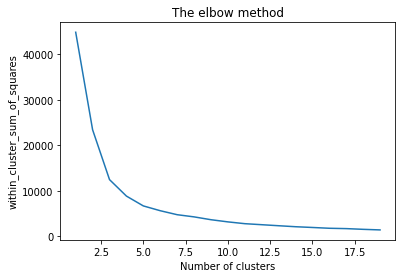

In [21]:

from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(data3d)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 20), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()


In [22]:




kmeans = KMeans(
        init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42
    )
km = kmeans.fit(data3d)

already_seen = {}
labels = km.labels_
clusters = []

for i in range(len(log)):
        if not labels[i] in already_seen:
            already_seen[labels[i]] = len(list(already_seen.keys()))
            clusters.append(EventLog())
        trace = log[i]
        clusters[already_seen[labels[i]]].append(trace)

type(clusters[0]),len(clusters[0]),len(clusters[1]),len(clusters[2])


(pm4py.objects.log.obj.EventLog, 121, 924, 5)

In [23]:
sub_log1 = clusters[0]
sub_log2 = clusters[1]
sub_log3 = clusters[2]
#sub_log4 = clusters[3]



In [26]:
pm4py.write_xes(sub_log1, 'Sepsis_sublogs/sublog1.xes')
pm4py.write_xes(sub_log2, 'Sepsis_sublogs/sublog2.xes')
#pm4py.write_xes(sub_log3, 'Sepsis_sublogs/sublogs_hybrid_PCA/sublog3.xes')
#pm4py.write_xes(sub_log4, 'Sublogs - Kmeans- Set of activities - PCA/sublog4.xes')

exporting log, completed traces :: 100%|██████████| 924/924 [00:03<00:00, 289.36it/s]


In [66]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(merged)
descriptive_features_normailsed = pd.DataFrame(x_scaled)
descriptive_features_normailsed.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.094595,0.101449,0.019608,0.0,0.2,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.013514,0.014493,0.019608,0.0,0.2,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.067568,0.057971,0.019608,0.0,0.2,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.027027,0.028986,0.019608,0.0,0.2,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.094595,0.101449,0.098039,0.0,0.4,0.5,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


##  Elbow Method to extract optimal number of clusters

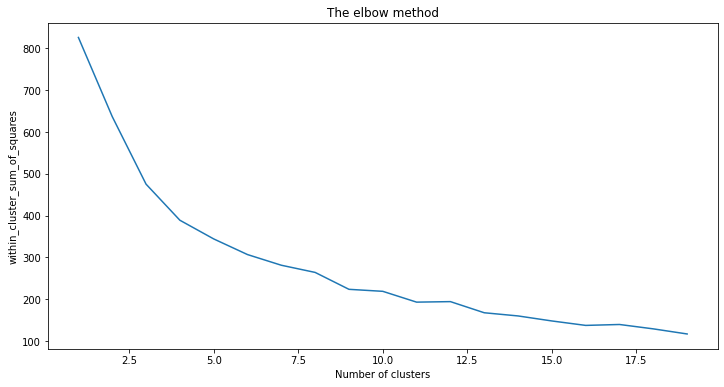

In [68]:

from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 600, n_init = 3, random_state = 42)
    kmeans.fit(descriptive_features_normailsed)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 20), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()


In [69]:




kmeans = KMeans(
        init="k-means++",
        n_clusters=8,
        n_init=10,
        max_iter=500,
        random_state=42
    )
km = kmeans.fit(descriptive_features_normailsed)

already_seen = {}
labels = km.labels_
clusters = []

for i in range(len(log)):
        if not labels[i] in already_seen:
            already_seen[labels[i]] = len(list(already_seen.keys()))
            clusters.append(EventLog())
        trace = log[i]
        clusters[already_seen[labels[i]]].append(trace)


In [70]:
type(clusters[0]),len(clusters[0]),len(clusters[1]),len(clusters[2]),len(clusters[3]),len(clusters[4]),len(clusters[5]),len(clusters[6]),len(clusters[7])

(pm4py.objects.log.obj.EventLog, 277, 189, 46, 46, 73, 44, 59, 43)

In [71]:
sub_log1 = clusters[0]
sub_log2 = clusters[1]
sub_log3 = clusters[2]
sub_log4 = clusters[3]
sub_log5 = clusters[4]
sub_log6 = clusters[5]
sub_log7 = clusters[6]
sub_log8 = clusters[7]


In [72]:
pm4py.write_xes(sub_log1, 'sublogs_hybrid_normalised/sublog1.xes')
pm4py.write_xes(sub_log2, 'sublogs_hybrid_normalised/sublog2.xes')
pm4py.write_xes(sub_log3, 'sublogs_hybrid_normalised/sublog3.xes')
pm4py.write_xes(sub_log4, 'sublogs_hybrid_normalised/sublog4.xes')
pm4py.write_xes(sub_log5, 'sublogs_hybrid_normalised/sublog5.xes')
pm4py.write_xes(sub_log6, 'sublogs_hybrid_normalised/sublog6.xes')
pm4py.write_xes(sub_log7, 'sublogs_hybrid_normalised/sublog7.xes')
pm4py.write_xes(sub_log8, 'sublogs_hybrid_normalised/sublog8.xes')

exporting log, completed traces :: 100%|██████████| 43/43 [00:00<00:00, 319.34it/s]
